In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/small-lung-nodule-lung-cancer-dataset/Features_Train.csv
/kaggle/input/small-lung-nodule-lung-cancer-dataset/Lung Nodule/Lung Nodule/Features_Test.csv
/kaggle/input/small-lung-nodule-lung-cancer-dataset/Lung Nodule/Lung Nodule/Features_Train.csv


In [2]:
import pandas as pd

In [59]:
df=pd.read_csv("/kaggle/input/small-lung-nodule-lung-cancer-dataset/Features_Train.csv",index_col='ID')
df.head()

,Annulus_N.voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,Annulus_FOS_CV,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
ID,,,,,,,,,,,,,,,,,,,,,
0001_1,1504,1504,3364,2.236702,0.188709,5.299155,3.779511,0.006720,21,-0.134648,...,1.456343,0.516489,1.478822,12.359264,1.122325,0.672912,0.972564,0.898164,0.519051,0
0003_1,1007,1007,2224,2.208540,0.218459,4.577528,3.334505,0.010426,16,-0.181334,...,1.462379,0.535239,1.502895,12.134616,1.132018,0.675078,0.971933,0.898085,0.502191,0
0004_1,2160,2160,4322,2.000926,0.186969,5.348493,4.592921,0.006536,17,-0.137715,...,1.050196,0.245968,0.988000,2.261923,0.527141,0.763604,0.905442,0.842403,0.472791,1
0005_1,1568,1568,3276,2.089286,0.199237,5.019137,4.010592,0.007909,23,-0.630353,...,1.157852,0.299988,1.146312,6.241820,0.605958,0.733500,0.965438,0.891646,0.504706,1
0006_1,779,779,1702,2.184852,0.240556,4.157036,3.083113,0.013920,14,-0.566782,...,1.414994,0.484908,1.434273,6.282063,1.046868,0.692436,0.964913,0.889447,0.487179,0


In [60]:
df.shape

(609, 1999)

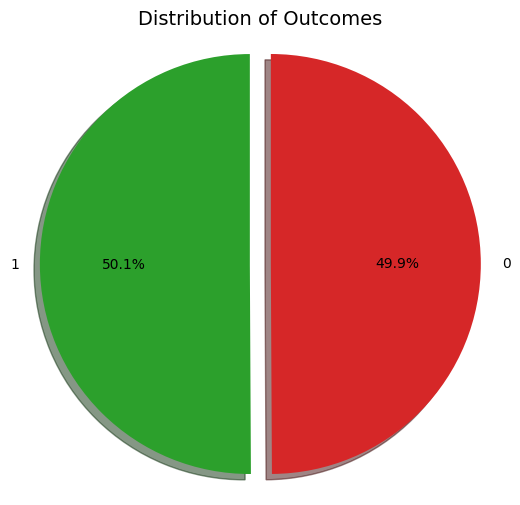

In [61]:
import matplotlib.pyplot as plt

# Plot pie chart with percentages and custom colors
plt.figure(figsize=(6, 6))  # Set figure size

# Define colors for the chart
colors = ['#2ca02c', '#d62728', '#9467bd']

# Plot pie chart
df['Outcome'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,      # Start from the top
    colors=colors,      # Use custom colors
    explode=[0.1 if i == 0 else 0 for i in range(len(df['Outcome'].value_counts()))],  # Slightly explode the largest slice
    shadow=True         # Add shadow for better visualization
)

# Add title
plt.title("Distribution of Outcomes", fontsize=14)

# Ensure equal aspect ratio for the pie
plt.ylabel('')  # Remove default y-axis label
plt.axis('equal')

# Show the plot
plt.show()

In [62]:
df.isnull().sum().sum()

0

In [65]:
test=pd.read_csv('/kaggle/input/small-lung-nodule-lung-cancer-dataset/Lung Nodule/Lung Nodule/Features_Test.csv',index_col='ID')
test.head()

,Annulus_N voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,Annulus_FOS_CV,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
ID,,,,,,,,,,,,,,,,,,,,,
0454_1,2297,2297,4624,2.013061,0.182071,5.492369,4.669182,0.006036,23,-1.056783,...,1.039347,0.245617,0.987064,2.250009,0.512441,0.756273,0.902509,0.837515,0.487455,1
0455_1,1655,1655,3370,2.036254,0.200780,4.980586,4.154032,0.008094,22,-0.357171,...,1.044802,0.244690,0.984586,2.256110,0.522768,0.761412,0.904565,0.840941,0.477177,0
0455_2,1960,1960,4172,2.128571,0.181542,5.508366,4.266957,0.005983,22,-0.268764,...,1.056757,0.251109,1.008803,2.263776,0.522695,0.756632,0.951032,0.878203,0.484911,0
0455_3,1782,1782,3788,2.125701,0.187649,5.329102,4.137387,0.006608,21,-0.153823,...,1.047968,0.249339,0.998092,2.238642,0.513910,0.757087,0.902835,0.838058,0.485826,0
0456_1,600,600,1322,2.203333,0.260228,3.842789,2.810317,0.017622,15,-0.106024,...,1.310203,0.423329,1.351448,12.136032,0.850684,0.704249,0.969073,0.895660,0.499861,0


In [141]:
feature_mapping = {
    'Lesion_AUC_CSH_HHH': 'Lesion_AUC.CSH_HHH',
    'Annulus_AUC_CSH_HHL': 'Annulus_AUC.CSH_HHL',
    'Lesion_AUC_CSH_LHH': 'Lesion_AUC.CSH_LHH',
    'Lesion_AUC_CSH_HHL': 'Lesion_AUC.CSH_HHL',
    'Lesion_AUC_CSH_LHL': 'Lesion_AUC.CSH_LHL',
    'Background_AUC_CSH_LHL': 'Background_AUC.CSH_LHL',
    'Background_AUC_CSH': 'Background_AUC.CSH',
    'Annulus_AUC_CSH_HHH': 'Annulus_AUC.CSH_HHH',
    'Lesion_AUC_CSH_LLL': 'Lesion_AUC.CSH_LLL',
    'Background_AUC_CSH_HHH': 'Background_AUC.CSH_HHH',
    'Annulus_AUC_CSH_HLL': 'Annulus_AUC.CSH_HLL',
    'Annulus_AUC_CSH_LHL': 'Annulus_AUC.CSH_LHL',
    'Lesion_AUC_CSH_LLH': 'Lesion_AUC.CSH_LLH',
    'Background_AUC_CSH_LLH': 'Background_AUC.CSH_LLH',
    'Background_AUC_CSH_HHL': 'Background_AUC.CSH_HHL',
    'Annulus_AUC_CSH_LHH': 'Annulus_AUC.CSH_LHH',
    'Lesion_AUC_CSH_HLH': 'Lesion_AUC.CSH_HLH',
    'Lesion_AUC_CSH': 'Lesion_AUC.CSH',
    'Annulus_AUC_CSH_LLH': 'Annulus_AUC.CSH_LLH',
    'Background_AUC_CSH_HLL': 'Background_AUC.CSH_HLL',
    'Annulus_AUC_CSH_HLH': 'Annulus_AUC.CSH_HLH',
    'Annulus_AUC_CSH': 'Annulus_AUC.CSH',
    'Background_AUC_CSH_LLL': 'Background_AUC.CSH_LLL',
    'Lesion_AUC_CSH_HLL': 'Lesion_AUC.CSH_HLL',
    'Annulus_AUC_CSH_LLL': 'Annulus_AUC.CSH_LLL',
    'Background_AUC_CSH_LHH': 'Background_AUC.CSH_LHH',
    'Background_AUC_CSH_HLH': 'Background_AUC.CSH_HLH'
}

# Now, apply the feature mapping to the test dataframe
test = test.rename(columns=feature_mapping)

# Verify the changes by printing the updated columns
print(test.columns)

Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_CV',
       ...
       'Lesion_GLCM_sumEnt_HHH_25HUgl', 'Lesion_GLCM_difVar_HHH_25HUgl',
       'Lesion_GLCM_difEnt_HHH_25HUgl', 'Lesion_GLCM_AutoCorrel_HHH_25HUgl',
       'Lesion_GLCM_ClTend_HHH_25HUgl', 'Lesion_GLCM_Homoge1_HHH_25HUgl',
       'Lesion_GLCM_IDMN_HHH_25HUgl', 'Lesion_GLCM_IDN_HHH_25HUgl',
       'Lesion_GLCM_invVar_HHH_25HUgl', 'Outcome'],
      dtype='object', length=1999)


In [152]:
# Get the list of features (columns) in the training and test datasets
train_features = set(df.drop(columns=['Outcome']).columns)  # Exclude 'Outcome' from the train data
test_features = set(test.drop(columns=['Outcome']).columns)  # Exclude 'Outcome' from the test data

# Find features that are in the train data but not in the test data
missing_in_test = train_features - test_features

# Find features that are in the test data but not in the train data
missing_in_train = test_features - train_features

# Display results
if missing_in_test:
    print(f"Features in the training data but not in the test data: {missing_in_test}")
else:
    print("All features in the training data are present in the test data.")

if missing_in_train:
    print(f"Features in the test data but not in the training data: {missing_in_train}")
else:
    print("All features in the test data are present in the training data.")


All features in the training data are present in the test data.
All features in the test data are present in the training data.


In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assuming 'df' is the full training data and 'test' is the test set
X_train = df.drop(columns=['Outcome'])  # Independent features for training
y_train = df['Outcome']  # Dependent variable for training

X_test = test.drop(columns=['Outcome'])  # Independent features for testing
y_test = test['Outcome']  # Dependent variable for testing

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for better handling of column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Calculate the correlation matrix and remove features with high correlation
corr_matrix = X_train_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features from the scaled training and test sets
X_train_scaled.drop(columns=to_drop, inplace=True)
X_test_scaled.drop(columns=to_drop, inplace=True)

In [145]:

# Function to compute sensitivity and specificity
def calculate_sensitivity_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()  # Confusion matrix [TN, FP, FN, TP]
    sensitivity = tp / (tp + fn)  # Sensitivity (Recall)
    specificity = tn / (tn + fp)  # Specificity
    return sensitivity, specificity


In [146]:

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')


Applying Lasso for feature selection...


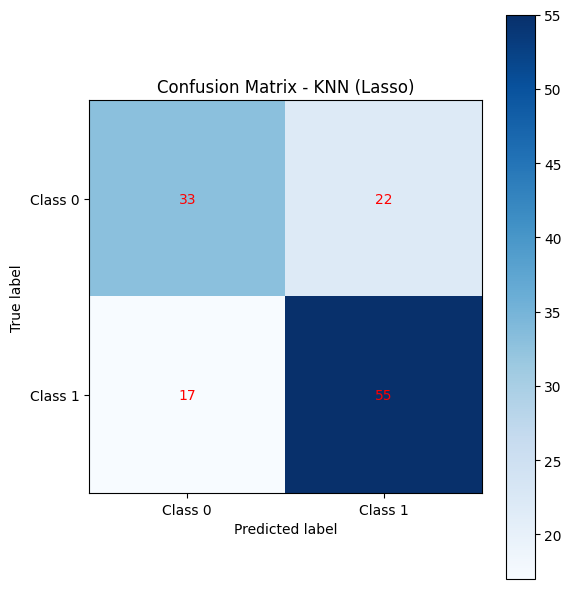

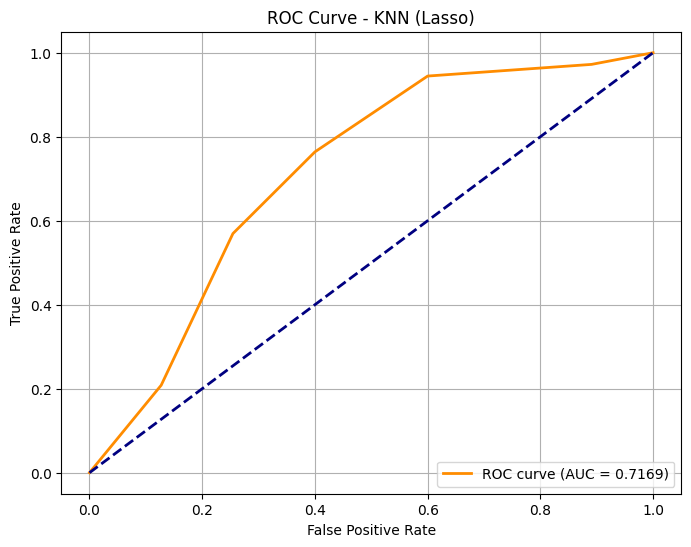

KNN - Accuracy: 0.6929
Confusion Matrix:
[[33 22]
 [17 55]]
Sensitivity: 0.7639
Specificity: 0.6000
AUC: 0.7169
----------------------------------------


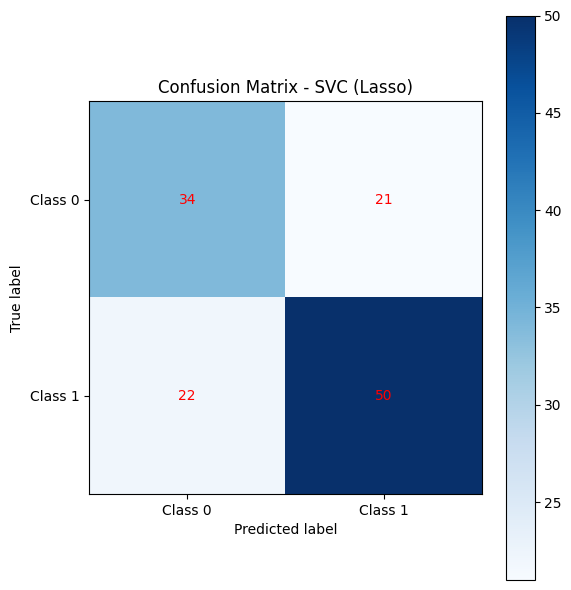

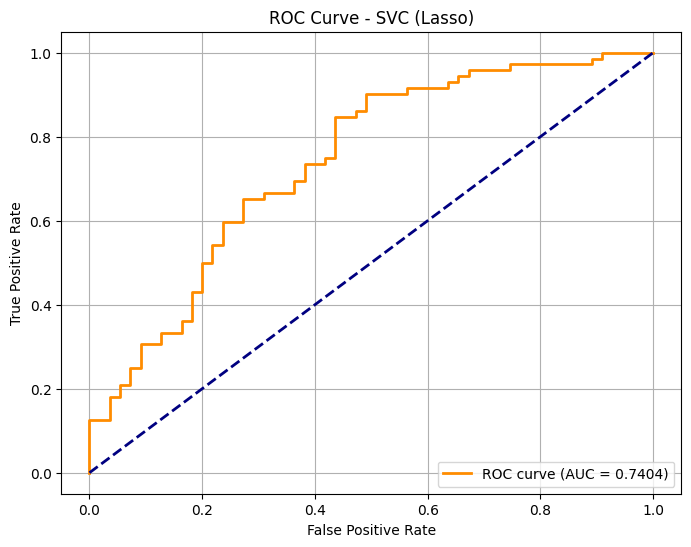

SVC - Accuracy: 0.6614
Confusion Matrix:
[[34 21]
 [22 50]]
Sensitivity: 0.6944
Specificity: 0.6182
AUC: 0.7404
----------------------------------------


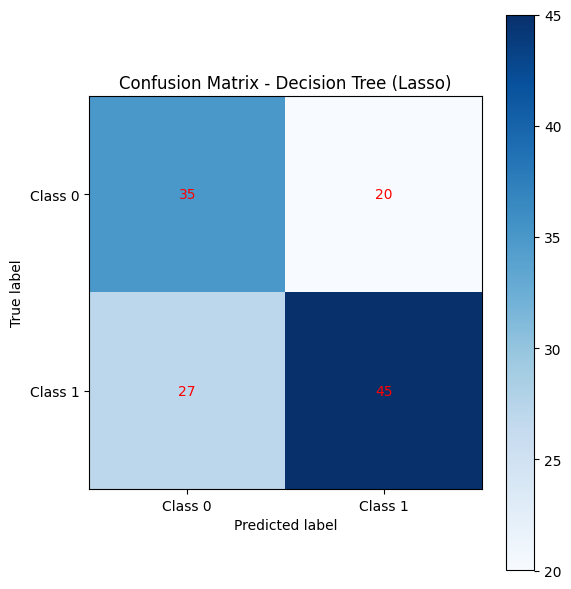

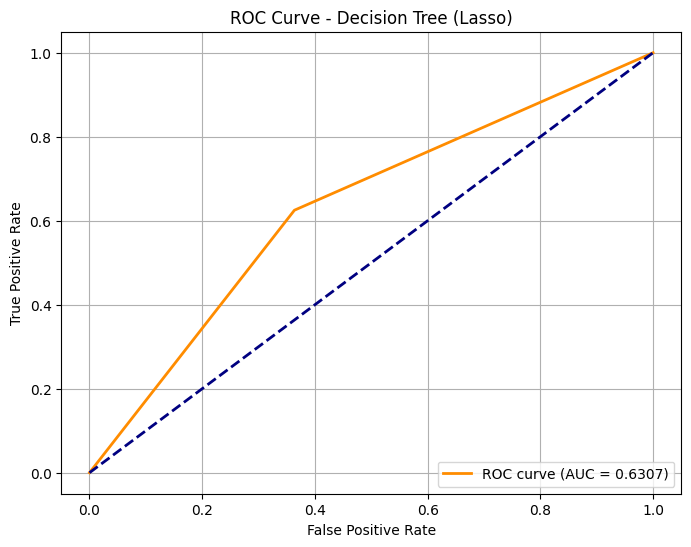

Decision Tree - Accuracy: 0.6299
Confusion Matrix:
[[35 20]
 [27 45]]
Sensitivity: 0.6250
Specificity: 0.6364
AUC: 0.6307
----------------------------------------


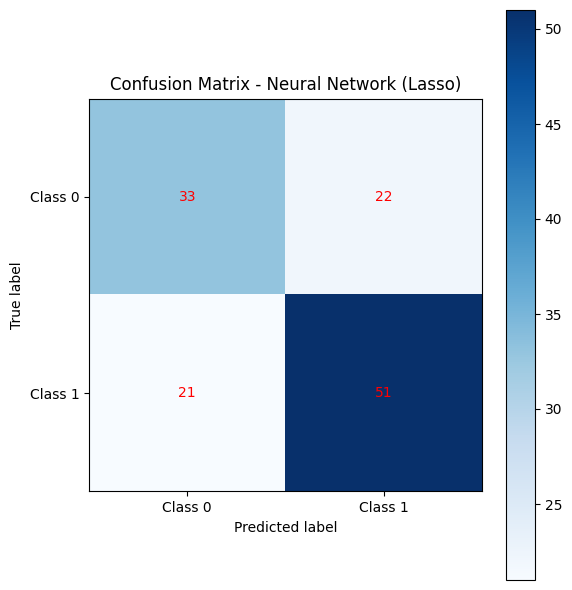

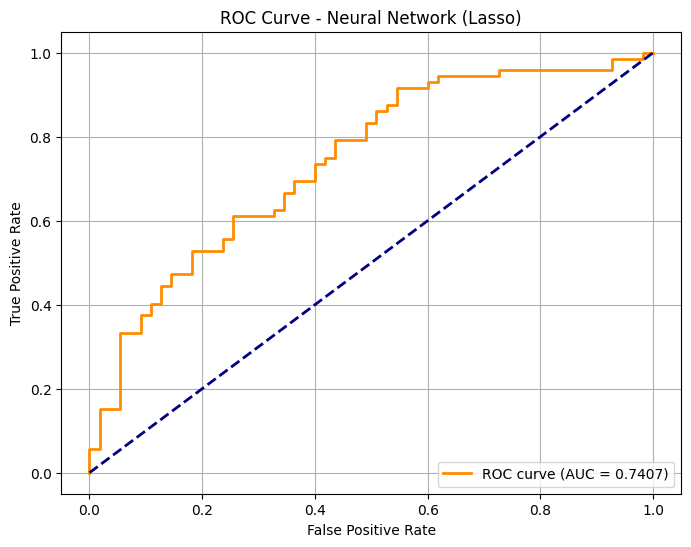

Neural Network - Accuracy: 0.6614
Confusion Matrix:
[[33 22]
 [21 51]]
Sensitivity: 0.7083
Specificity: 0.6000
AUC: 0.7407
----------------------------------------

Applying Mutual Information for feature selection...


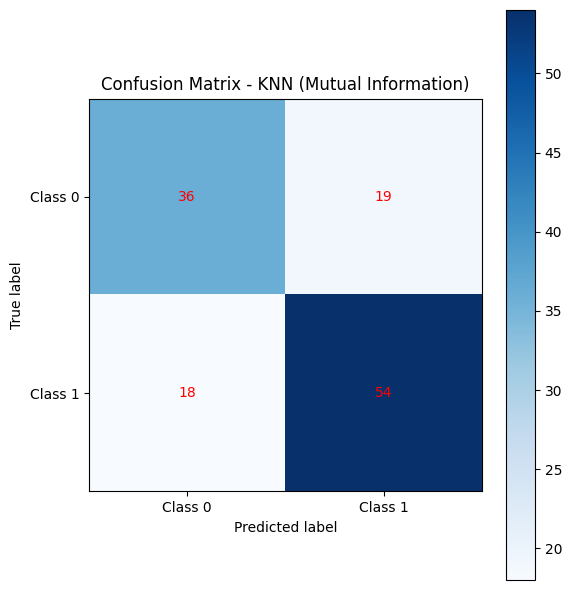

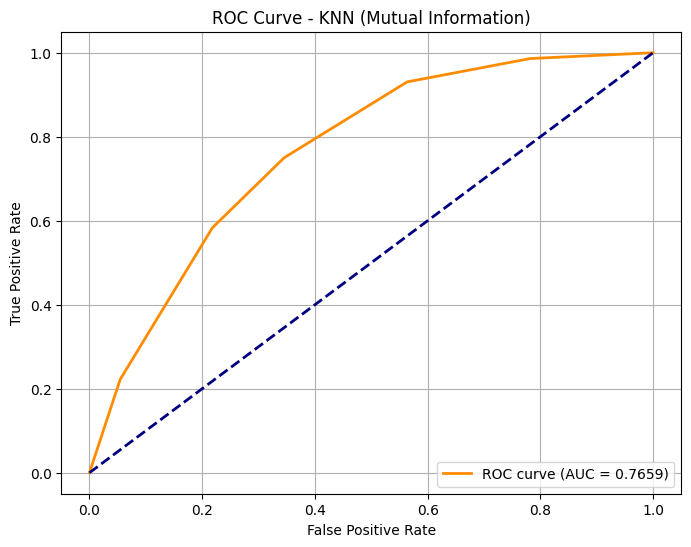

KNN - Accuracy: 0.7087
Confusion Matrix:
[[36 19]
 [18 54]]
Sensitivity: 0.7500
Specificity: 0.6545
AUC: 0.7659
----------------------------------------


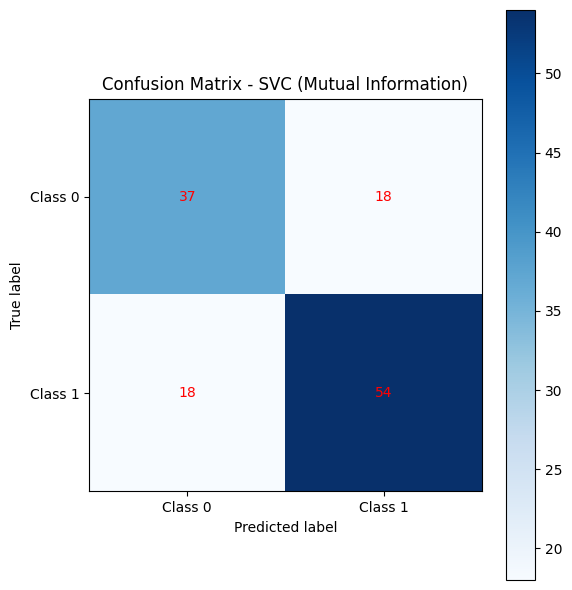

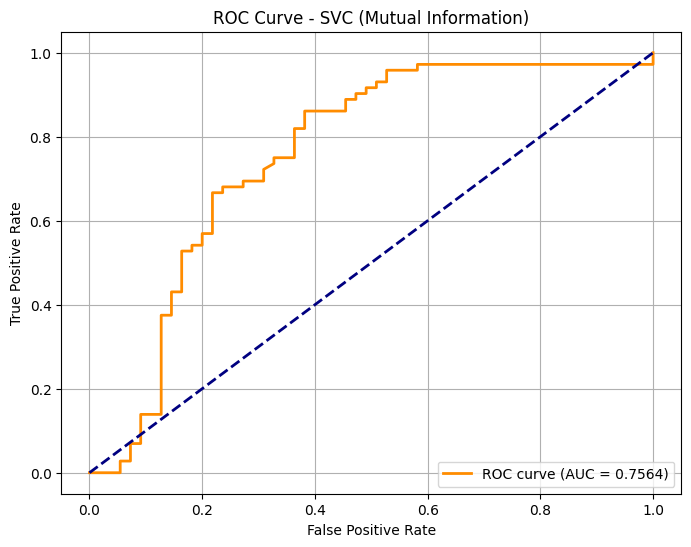

SVC - Accuracy: 0.7165
Confusion Matrix:
[[37 18]
 [18 54]]
Sensitivity: 0.7500
Specificity: 0.6727
AUC: 0.7564
----------------------------------------


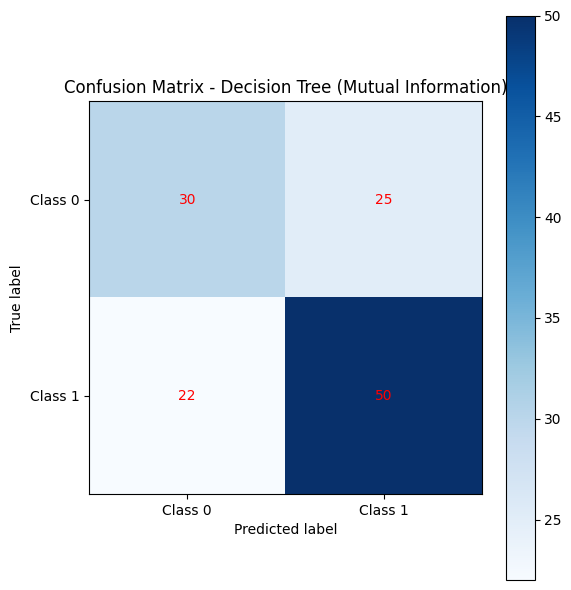

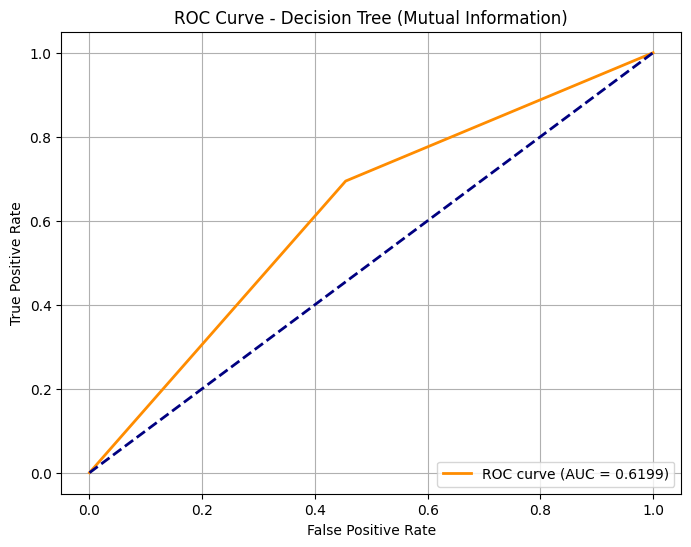

Decision Tree - Accuracy: 0.6299
Confusion Matrix:
[[30 25]
 [22 50]]
Sensitivity: 0.6944
Specificity: 0.5455
AUC: 0.6199
----------------------------------------


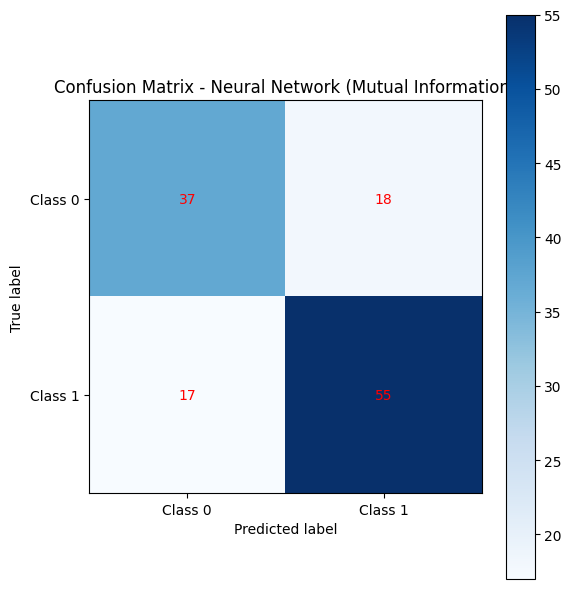

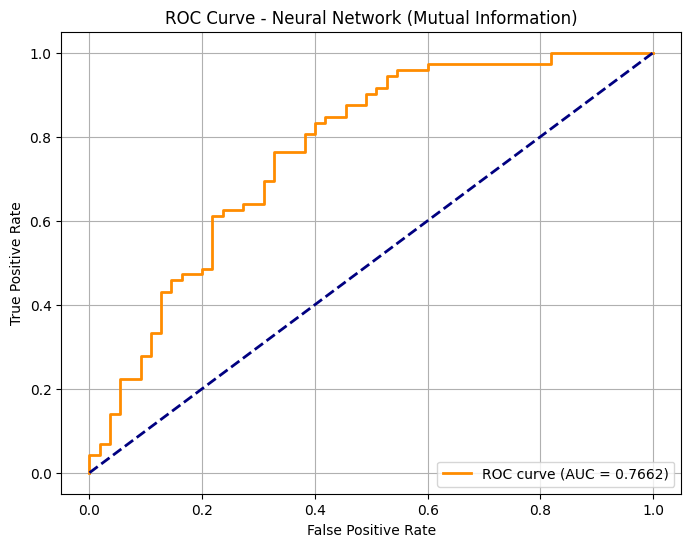

Neural Network - Accuracy: 0.7244
Confusion Matrix:
[[37 18]
 [17 55]]
Sensitivity: 0.7639
Specificity: 0.6727
AUC: 0.7662
----------------------------------------

Applying Variance Threshold for feature selection...


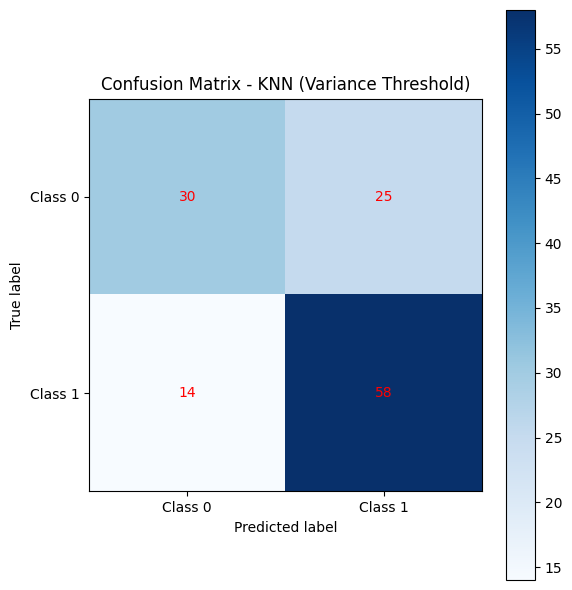

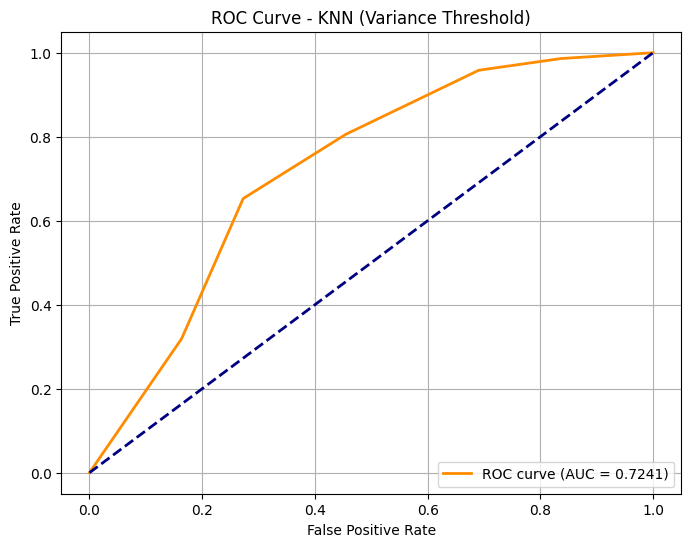

KNN - Accuracy: 0.6929
Confusion Matrix:
[[30 25]
 [14 58]]
Sensitivity: 0.8056
Specificity: 0.5455
AUC: 0.7241
----------------------------------------


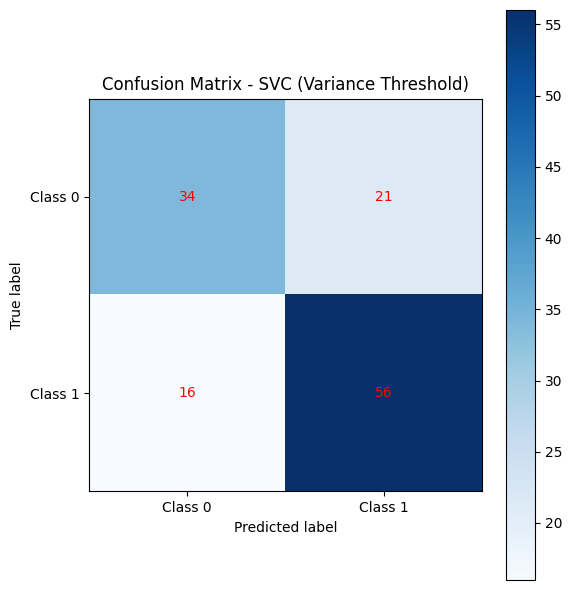

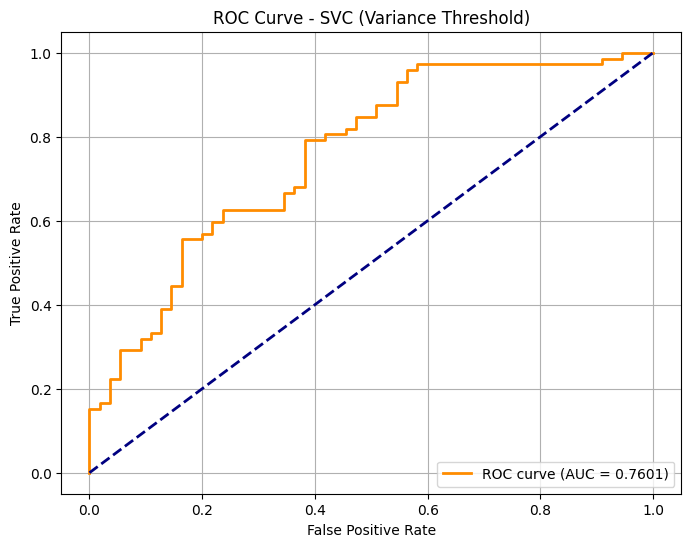

SVC - Accuracy: 0.7087
Confusion Matrix:
[[34 21]
 [16 56]]
Sensitivity: 0.7778
Specificity: 0.6182
AUC: 0.7601
----------------------------------------


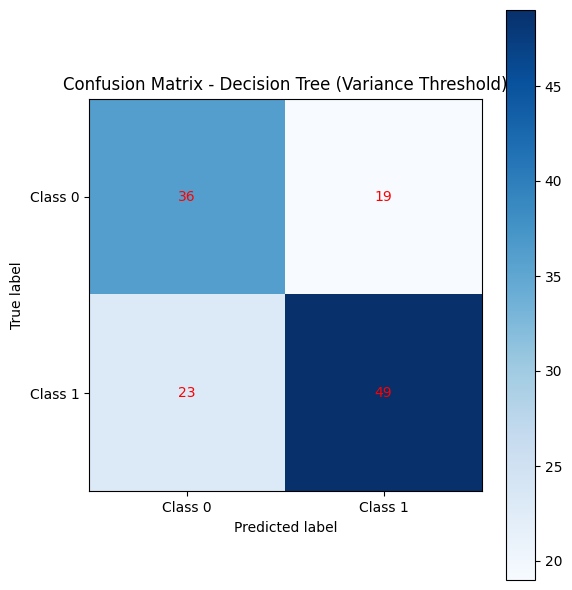

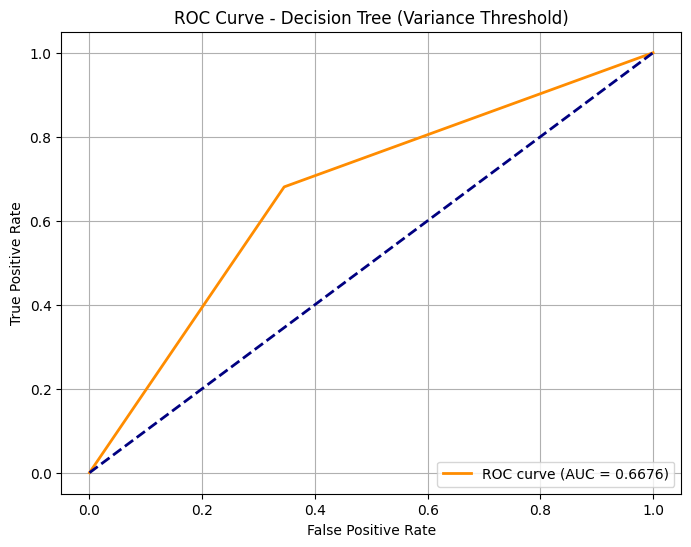

Decision Tree - Accuracy: 0.6693
Confusion Matrix:
[[36 19]
 [23 49]]
Sensitivity: 0.6806
Specificity: 0.6545
AUC: 0.6676
----------------------------------------


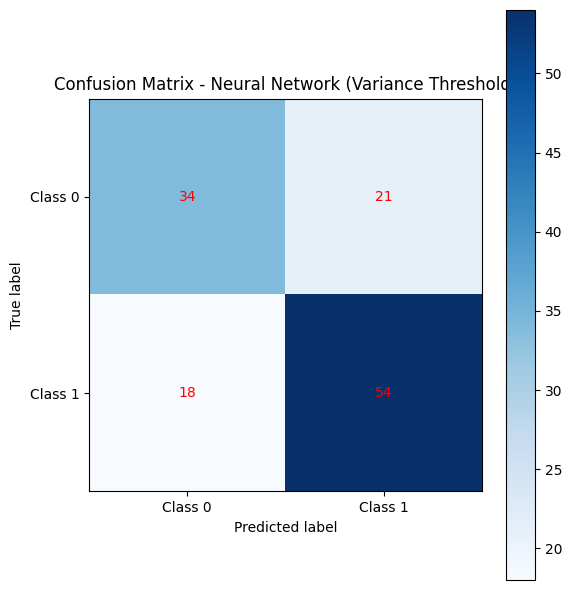

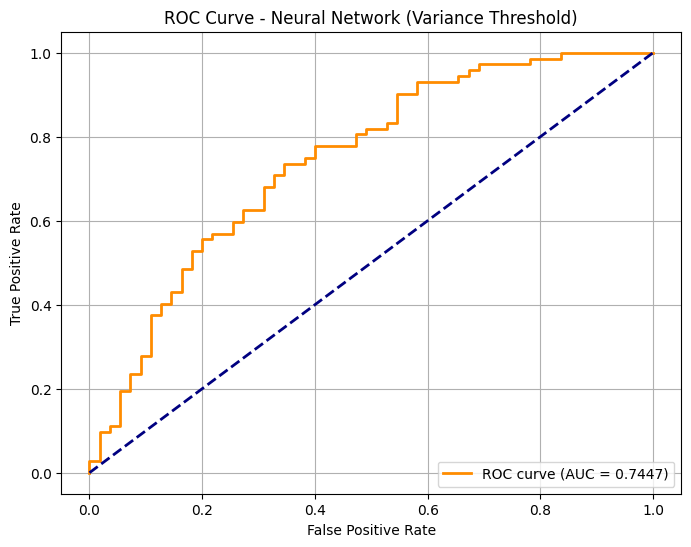

Neural Network - Accuracy: 0.6929
Confusion Matrix:
[[34 21]
 [18 54]]
Sensitivity: 0.7500
Specificity: 0.6182
AUC: 0.7447
----------------------------------------

Applying XGBoost for feature selection...


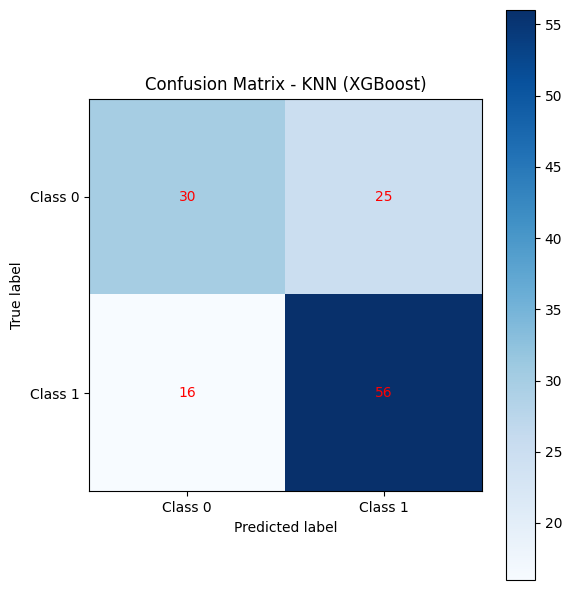

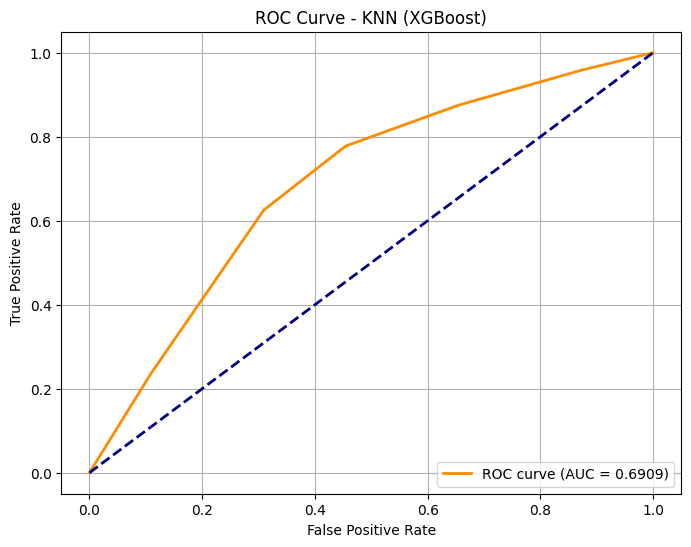

KNN - Accuracy: 0.6772
Confusion Matrix:
[[30 25]
 [16 56]]
Sensitivity: 0.7778
Specificity: 0.5455
AUC: 0.6909
----------------------------------------


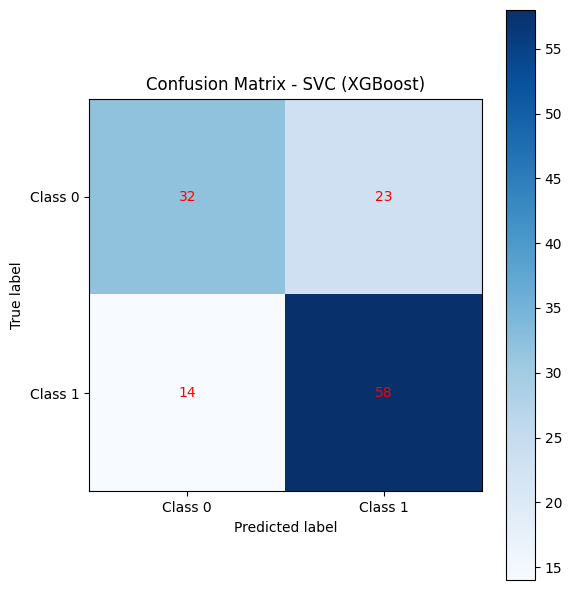

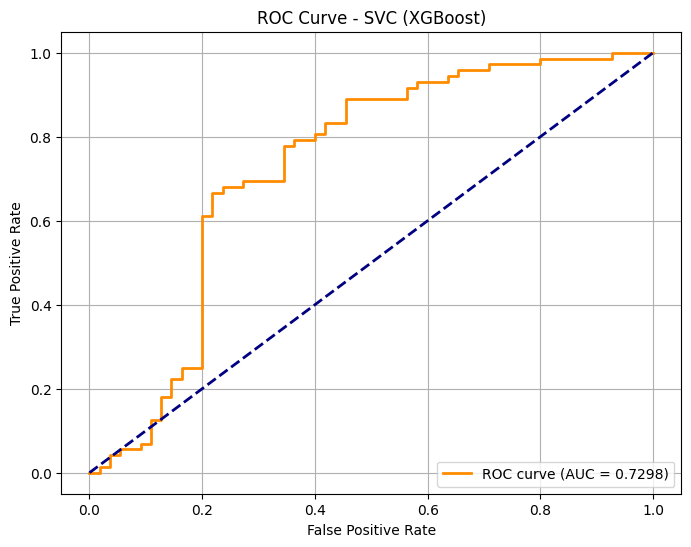

SVC - Accuracy: 0.7087
Confusion Matrix:
[[32 23]
 [14 58]]
Sensitivity: 0.8056
Specificity: 0.5818
AUC: 0.7298
----------------------------------------


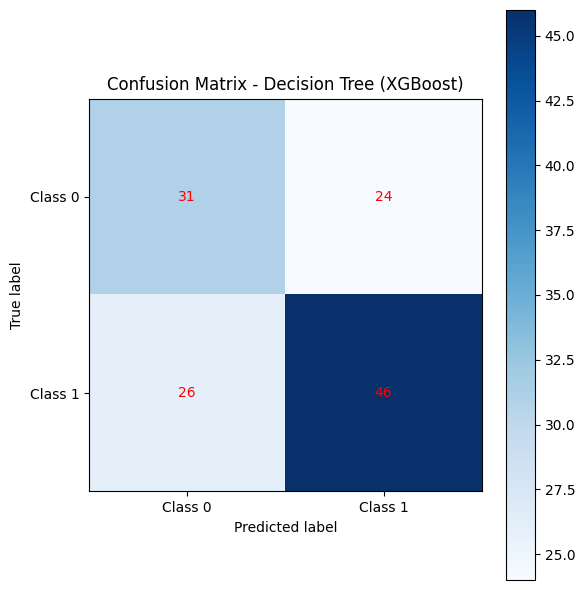

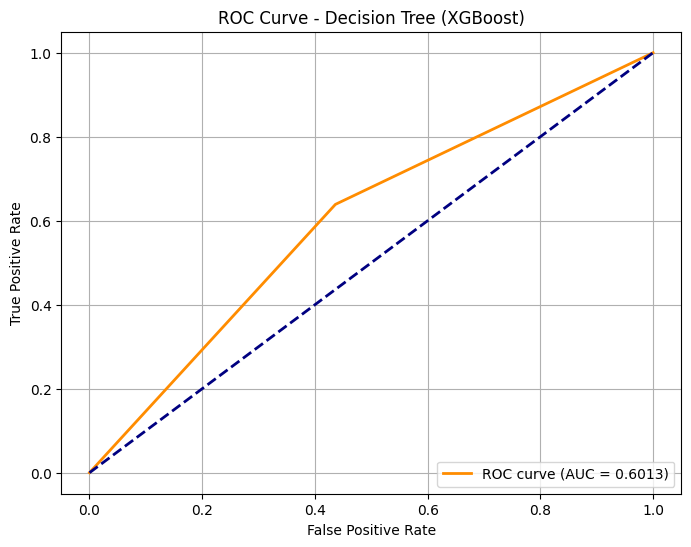

Decision Tree - Accuracy: 0.6063
Confusion Matrix:
[[31 24]
 [26 46]]
Sensitivity: 0.6389
Specificity: 0.5636
AUC: 0.6013
----------------------------------------


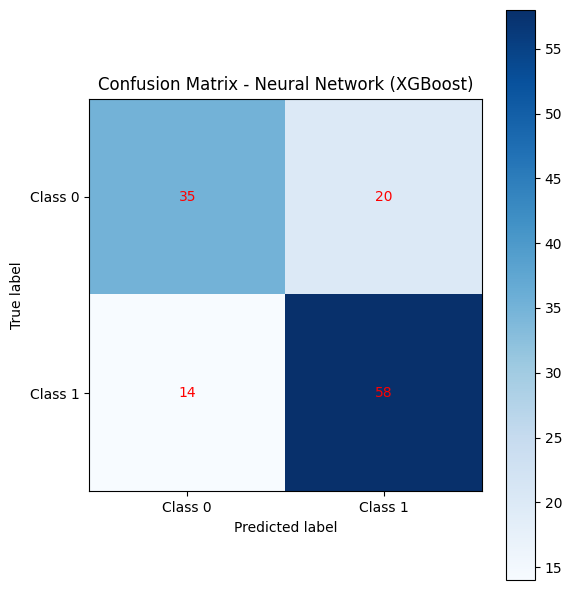

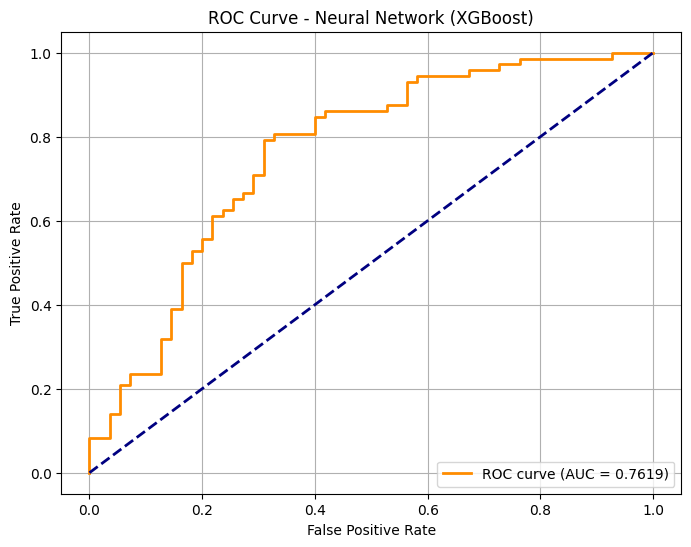

Neural Network - Accuracy: 0.7323
Confusion Matrix:
[[35 20]
 [14 58]]
Sensitivity: 0.8056
Specificity: 0.6364
AUC: 0.7619
----------------------------------------

Applying Boruta for feature selection...


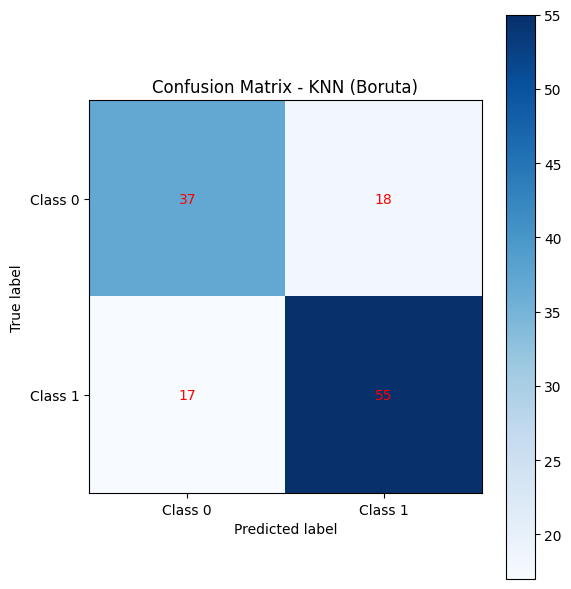

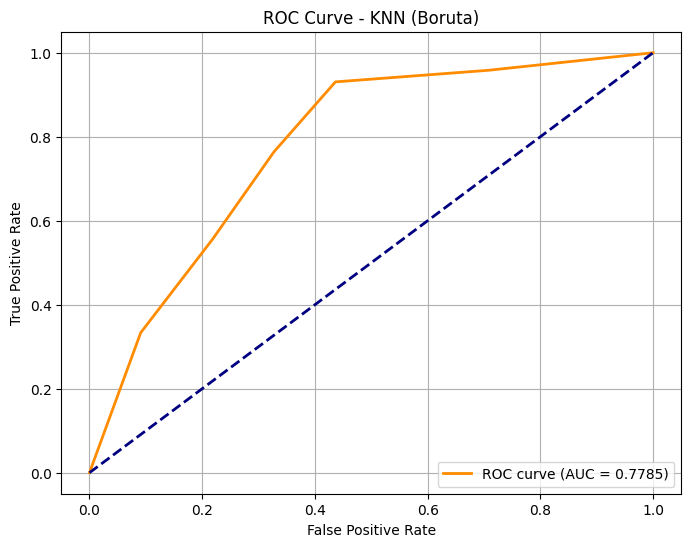

KNN - Accuracy: 0.7244
Confusion Matrix:
[[37 18]
 [17 55]]
Sensitivity: 0.7639
Specificity: 0.6727
AUC: 0.7785
----------------------------------------


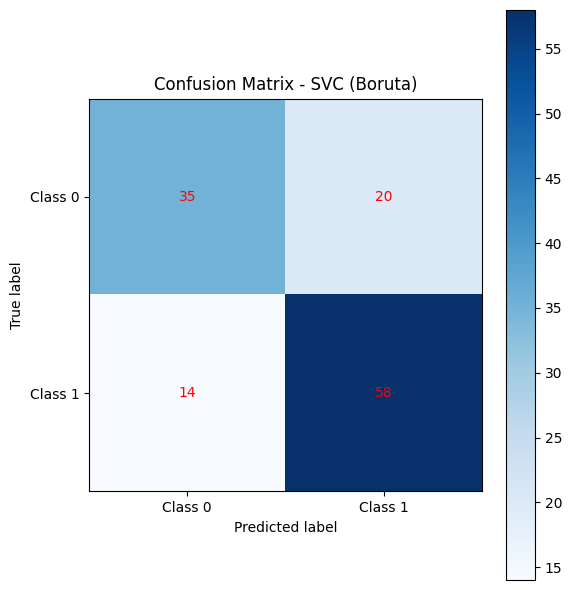

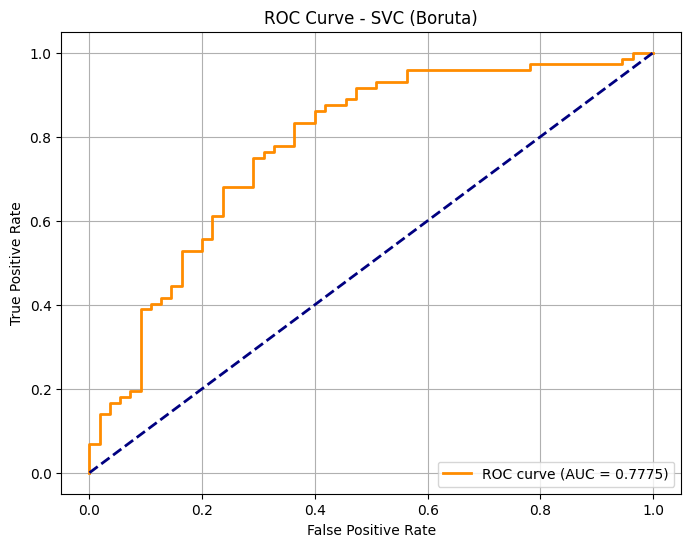

SVC - Accuracy: 0.7323
Confusion Matrix:
[[35 20]
 [14 58]]
Sensitivity: 0.8056
Specificity: 0.6364
AUC: 0.7775
----------------------------------------


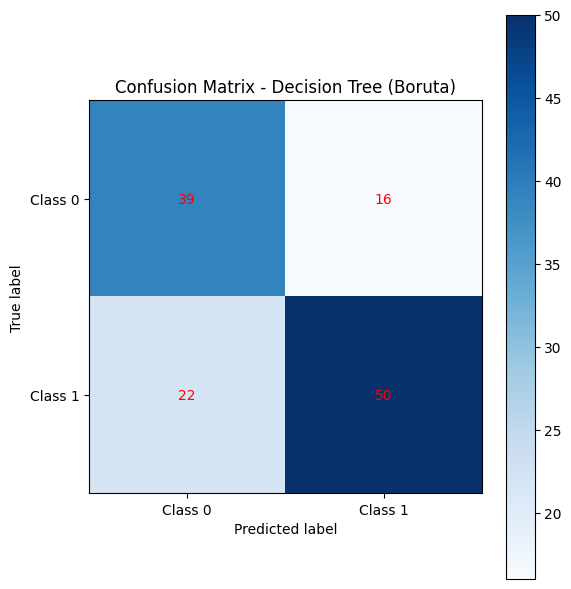

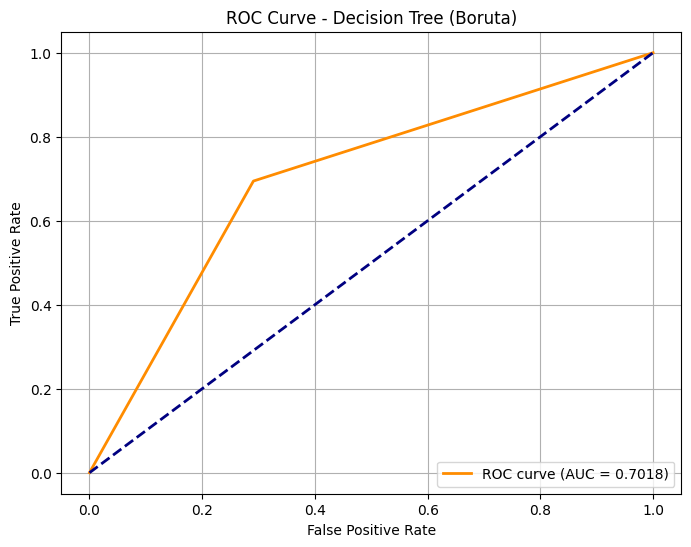

Decision Tree - Accuracy: 0.7008
Confusion Matrix:
[[39 16]
 [22 50]]
Sensitivity: 0.6944
Specificity: 0.7091
AUC: 0.7018
----------------------------------------


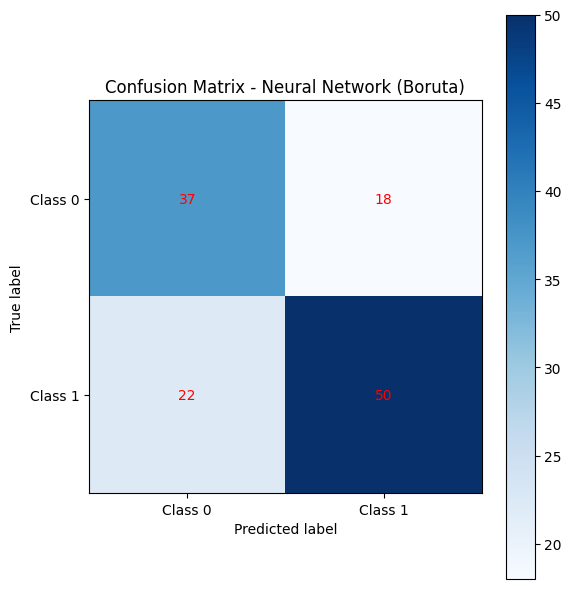

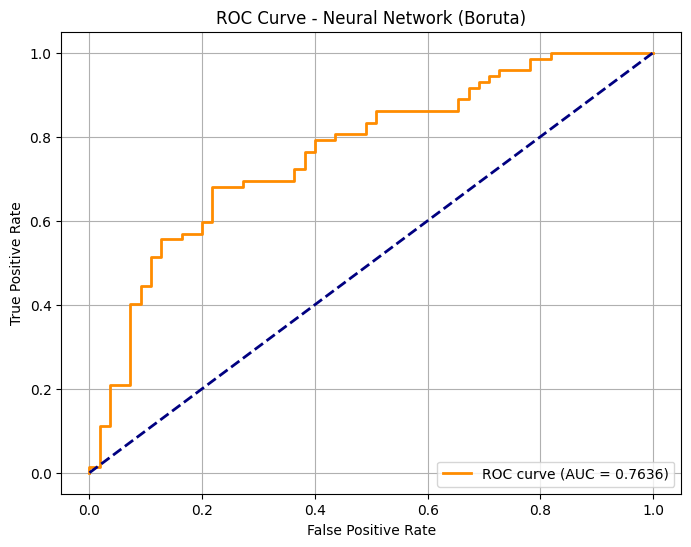

Neural Network - Accuracy: 0.6850
Confusion Matrix:
[[37 18]
 [22 50]]
Sensitivity: 0.6944
Specificity: 0.6727
AUC: 0.7636
----------------------------------------

Applying Pure Features for feature selection...


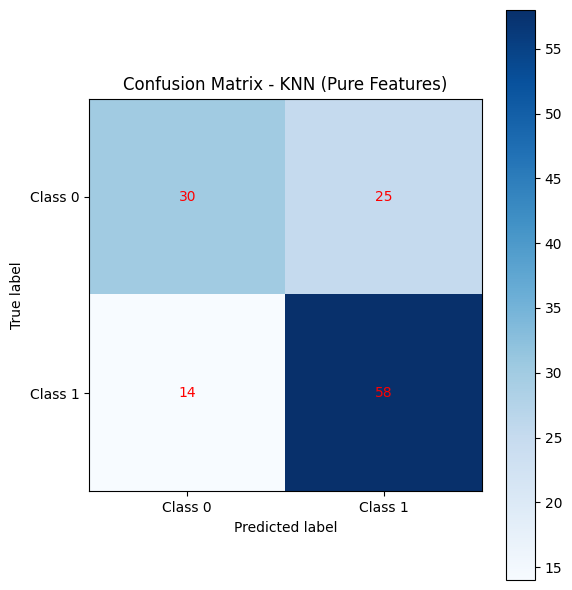

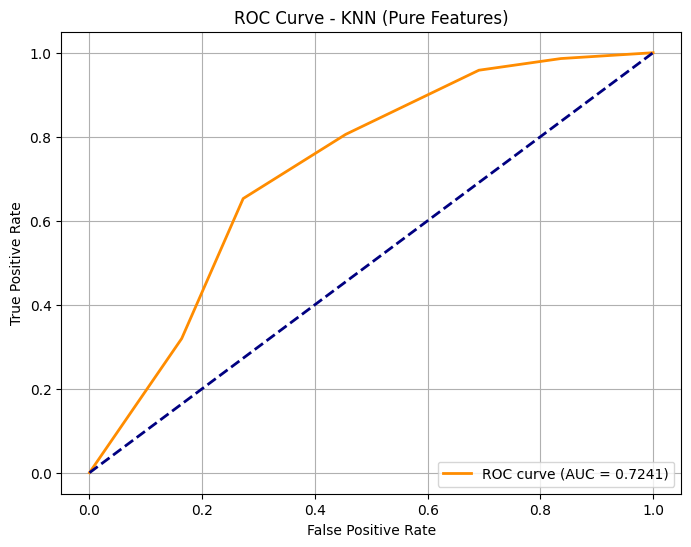

KNN - Accuracy: 0.6929
Confusion Matrix:
[[30 25]
 [14 58]]
Sensitivity: 0.8056
Specificity: 0.5455
AUC: 0.7241
----------------------------------------


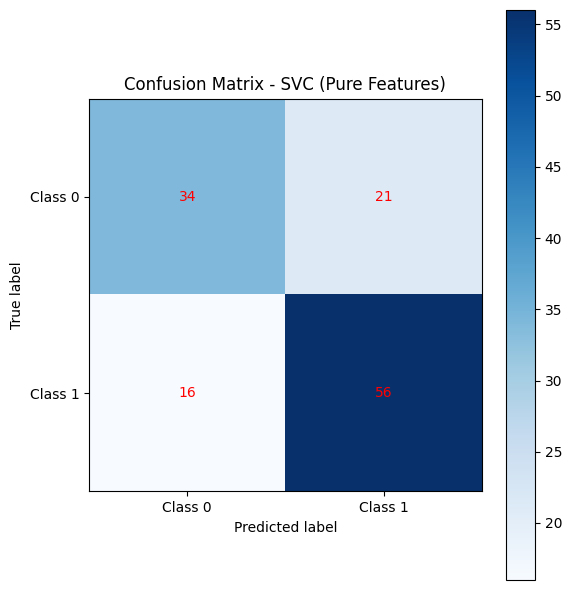

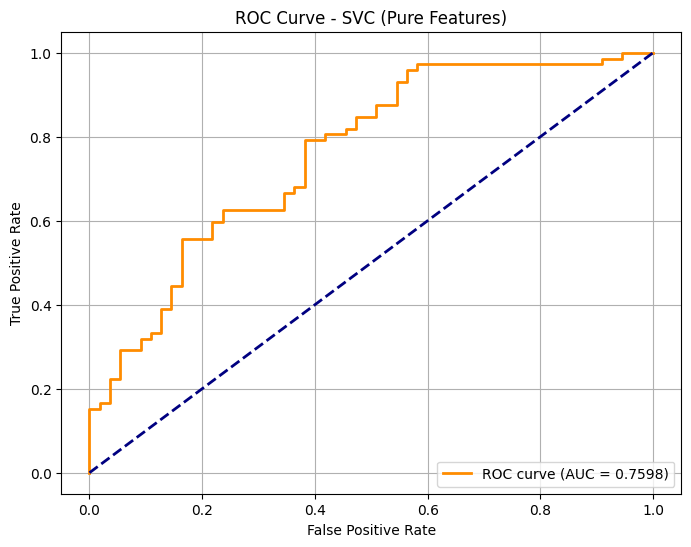

SVC - Accuracy: 0.7087
Confusion Matrix:
[[34 21]
 [16 56]]
Sensitivity: 0.7778
Specificity: 0.6182
AUC: 0.7598
----------------------------------------


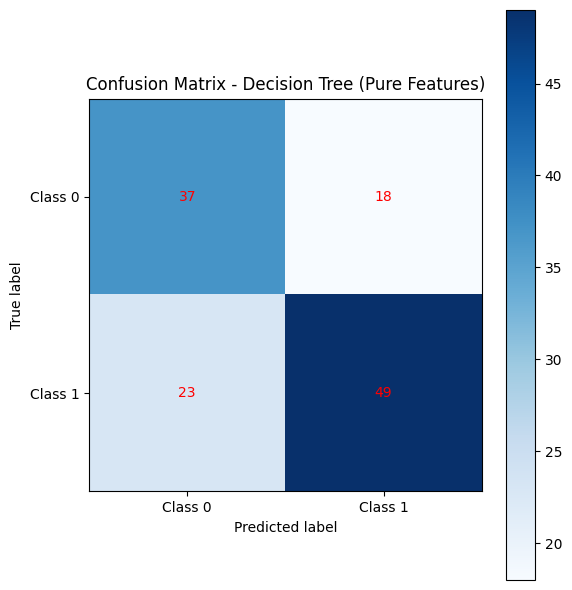

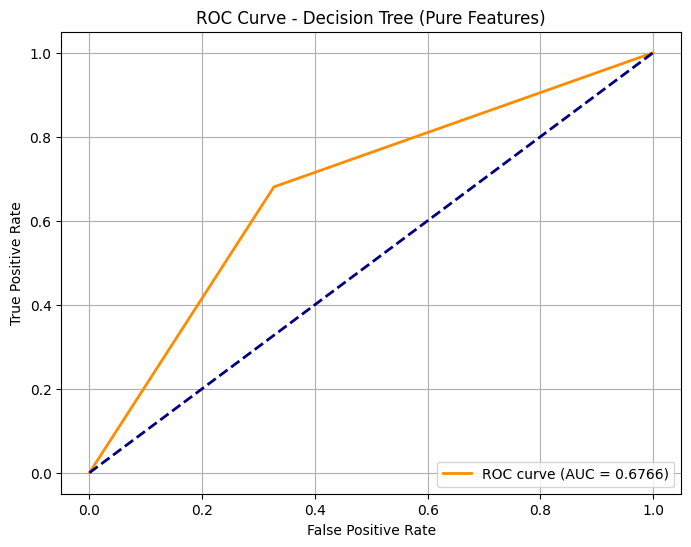

Decision Tree - Accuracy: 0.6772
Confusion Matrix:
[[37 18]
 [23 49]]
Sensitivity: 0.6806
Specificity: 0.6727
AUC: 0.6766
----------------------------------------


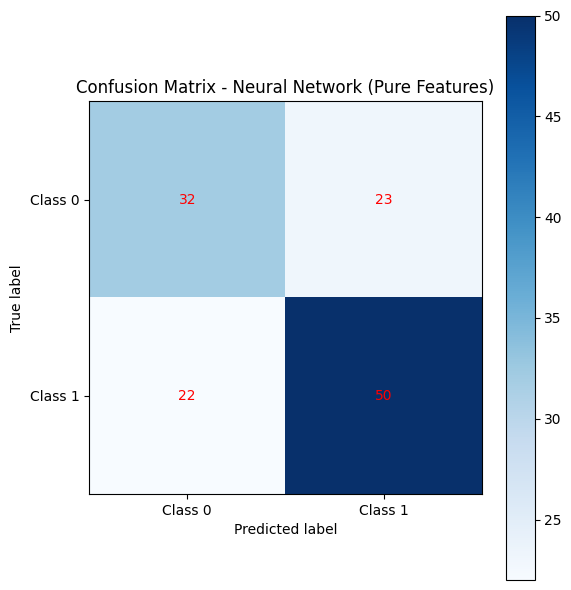

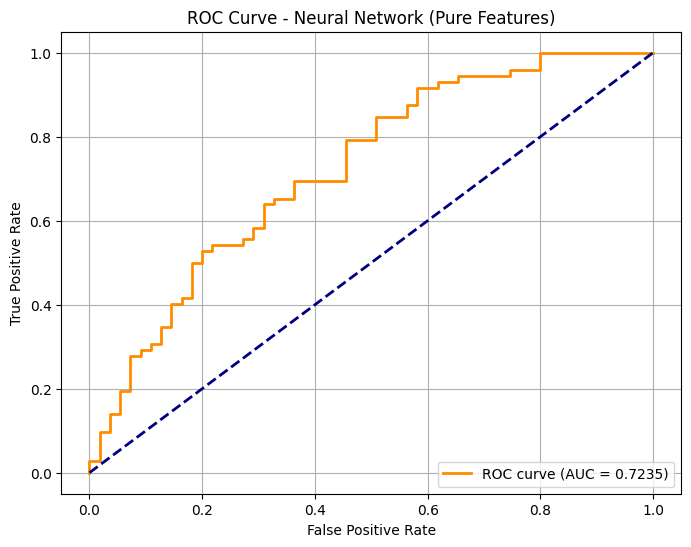

Neural Network - Accuracy: 0.6457
Confusion Matrix:
[[32 23]
 [22 50]]
Sensitivity: 0.6944
Specificity: 0.5818
AUC: 0.7235
----------------------------------------


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold
import xgboost as xgb
from boruta import BorutaPy
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, selector_name):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name} ({selector_name})")
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks([0, 1], ['Class 0', 'Class 1'])
    plt.yticks([0, 1], ['Class 0', 'Class 1'])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{cm[i, j]}", ha="center", va="center", color="red")
    
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name, selector_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title(f"ROC Curve - {model_name} ({selector_name})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Define the function to try all feature selection techniques and train models
def feature_selection_and_train(X_train, y_train, X_test, y_test):
    # Define the models for training
    models = {
        "KNN": KNeighborsClassifier(),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Neural Network": MLPClassifier(max_iter=1000),
    }

    # Feature Selection Methods
    selectors = {
        "Lasso": Lasso(alpha=0.01),
        "Mutual Information": SelectKBest(mutual_info_classif, k=10),
        "Variance Threshold": VarianceThreshold(threshold=0.1),
        "XGBoost": xgb.XGBClassifier(n_estimators=100),
        "Boruta": BorutaPy(RandomForestClassifier(n_estimators=100), n_estimators='auto', random_state=42)
    }

    # Add pure features as a baseline
    selectors["Pure Features"] = None

    # Create a dictionary to store the results
    results = {}

    for selector_name, selector in selectors.items():
        print(f"\nApplying {selector_name} for feature selection...")
        
        # For pure features, skip feature selection
        if selector_name == "Pure Features":
            selected_features = X_train.columns
            X_train_selected = X_train
            X_test_selected = X_test
        elif selector_name == "Lasso":
            selector.fit(X_train, y_train)
            selected_features = X_train.columns[(selector.coef_ != 0)]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]
        elif selector_name == "Mutual Information":
            selector.fit(X_train, y_train)
            selected_features = X_train.columns[selector.get_support()]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]
        elif selector_name == "Variance Threshold":
            selector.fit(X_train)
            selected_features = X_train.columns[selector.get_support()]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]
        elif selector_name == "XGBoost":
            selector.fit(X_train, y_train)
            importances = selector.feature_importances_
            indices = np.argsort(importances)[::-1]
            selected_features = X_train.columns[indices[:10]]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]
        elif selector_name == "Boruta":
            selector.fit(X_train.values, y_train.values)
            selected_features = X_train.columns[selector.support_]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]
        
        
        # Train and evaluate models
        for model_name, model in models.items():
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            sensitivity = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
            specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

            # ROC Curve and AUC
            y_prob = model.predict_proba(X_test_selected)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)

            # Plot the confusion matrix
            plot_confusion_matrix(conf_matrix, model_name, selector_name)

            # Plot the ROC curve
            plot_roc_curve(fpr, tpr, auc_score, model_name, selector_name)

            print(f"{model_name} - Accuracy: {accuracy:.4f}")
            print(f"Confusion Matrix:\n{conf_matrix}")
            print(f"Sensitivity: {sensitivity:.4f}")
            print(f"Specificity: {specificity:.4f}")
            print(f"AUC: {auc_score:.4f}")
            print("-" * 40)
            
            # Store the results
            if selector_name not in results:
                results[selector_name] = {}
            results[selector_name][model_name] = {
                "accuracy": accuracy,
                "sensitivity": sensitivity,
                "specificity": specificity,
                "auc": auc_score
            }

    return results

# Assuming you have already prepared X_train, y_train, X_test, y_test
# Call the function and pass your data
results = feature_selection_and_train(X_train_scaled, y_train, X_test_scaled, y_test)


In [169]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

data = {
    'Feature Selection Method': [
        'Lasso', 'Lasso', 'Lasso', 'Lasso',
        'Mutual Information', 'Mutual Information', 'Mutual Information', 'Mutual Information',
        'Variance Threshold', 'Variance Threshold', 'Variance Threshold', 'Variance Threshold',
        'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost',
        'Boruta', 'Boruta', 'Boruta', 'Boruta',
        'Pure Features', 'Pure Features', 'Pure Features', 'Pure Features',
        'External Test Dataset'
    ],
    'Model': [
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'KNN', 'SVC', 'Decision Tree', 'Neural Network',
        'Reference'
    ],
    'Accuracy': [
        0.6929, 0.6614, 0.6299, 0.6614,
        0.7087, 0.7165, 0.6299, 0.7244,
        0.6929, 0.7087, 0.6693, 0.6929,
        0.6772, 0.7087, 0.6063, 0.7323,
        0.7244, 0.7323, 0.7008, 0.6850,
        0.6929, 0.7087, 0.6772, 0.6457,
        0.73
    ],
    'Sensitivity': [
        0.7639, 0.6944, 0.6250, 0.7083,
        0.7500, 0.7500, 0.6944, 0.7639,
        0.8056, 0.7778, 0.6806, 0.7500,
        0.7778, 0.8056, 0.6389, 0.8056,
        0.7639, 0.8056, 0.6944, 0.6944,
        0.8056, 0.7778, 0.6806, 0.6944,
        np.nan
    ],
    'Specificity': [
        0.6000, 0.6182, 0.6364, 0.6000,
        0.6545, 0.6727, 0.5455, 0.6727,
        0.5455, 0.6182, 0.6545, 0.6182,
        0.5455, 0.5818, 0.5636, 0.6364,
        0.6727, 0.6364, 0.7091, 0.6727,
        0.5455, 0.6182, 0.6727, 0.5818,
        np.nan
    ],
    'AUC': [
        0.7169, 0.7404, 0.6307, 0.7407,
        0.7659, 0.7564, 0.6199, 0.7662,
        0.7241, 0.7601, 0.6676, 0.7447,
        0.6909, 0.7298, 0.6013, 0.7619,
        0.7785, 0.7775, 0.7018, 0.7636,
        0.7241, 0.7598, 0.6766, 0.7235,
        0.78
    ]
}

df = pd.DataFrame(data)

# Function to bold the maximum value in each column
def bold_max(s):
    is_max = s == s.max(skipna=True)
    return ['font-weight: bold' if v else '' for v in is_max]

# Apply the style
styled_df = df.style.apply(bold_max, subset=['Accuracy', 'Sensitivity', 'Specificity', 'AUC'])

# Apply specific styling for the last row (External Test Dataset)
styled_df = styled_df.apply(lambda x: ['background-color: lightgray' if x.name == len(df)-1 else '' for i in x], axis=1)

# Render the styled DataFrame as HTML
html_table = styled_df.to_html()

# Display the table
display(HTML(html_table))


,Feature Selection Method,Model,Accuracy,Sensitivity,Specificity,AUC
0,Lasso,KNN,0.692900,0.763900,0.600000,0.716900
1,Lasso,SVC,0.661400,0.694400,0.618200,0.740400
2,Lasso,Decision Tree,0.629900,0.625000,0.636400,0.630700
3,Lasso,Neural Network,0.661400,0.708300,0.600000,0.740700
4,Mutual Information,KNN,0.708700,0.750000,0.654500,0.765900
5,Mutual Information,SVC,0.716500,0.750000,0.672700,0.756400
6,Mutual Information,Decision Tree,0.629900,0.694400,0.545500,0.619900
7,Mutual Information,Neural Network,0.724400,0.763900,0.672700,0.766200
8,Variance Threshold,KNN,0.692900,0.805600,0.545500,0.724100
9,Variance Threshold,SVC,0.708700,0.777800,0.618200,0.760100
